## Regret Analysis of OFL - Optimal Parameter & Regret Bound

### 0. Regret Bound & Communication Overhead

#### 0-1. Regret Bound ($\sqrt{\alpha T G^2K^2\|w_{\star}\|^2}$)
- FedOGD : $\alpha=2$
- OFedAvg : $\alpha=2/p$
- OFedAQ : $\alpha=2\left(1+\sqrt{D/s^2b}(p+1/K)\right)/p$
- OFedPAQ : $\alpha=2L\left(1+\sqrt{D/s^2b}(p+1/K)\right)/p$

#### 0-2. Communication Overhead (per time)
- FedOGD : $32KD$
- OFedAvg : $32pKD$
- OFedAQ : $pK(32b+D(1+\log{(s+1)}))$
- OFedPAQ : $pK(32b+D(1+\log{(s+1)}))/L$


---

### 1. Environment Setting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

K = 1000     # number of clients
D = 34826    # length of parameter vector

### 2. Find optimal parameter


$$\min_{s} \frac{\log(s+1)}{16 p_1} + \frac{4}{p_1}\times\left(\frac{p_1}{s}\right)^{2/3}.$$

In [2]:
def opt_param(p1, D, show_result):
    
    min_index = 1
    min_bound = -1
    bound_list = []

    for s in range(1, 100):
        bound = np.log2(s + 1)/(16*p1) + 4/p1 * np.power(p1/s, 2/3)
        bound_list.append(bound)
        alpha = np.power(p1/s, 2/3)
        p2 = 32 * p1/(32 * alpha + 1 + np.log2(s + 1))
        if (min_bound < 0 or min_bound > bound) and p2 < 1:
            min_bound = bound
            min_index = s
            min_alpha = alpha
            min_p2 = p2

    if show_result:
        print("OFedAQ optimal parameter same communication overhead with OFedAvg (p = %.3f)" %(p1))
        print("s =", min_index, ", alpha =", min_alpha)
        print("b =", int(min_alpha * D), ", p2 =", min_p2)

        plt.plot(bound_list)
        plt.show()
    
    return min_index, min_alpha, int(min_alpha * D), min_p2

OFedAQ optimal parameter same communication overhead with OFedAvg (p = 0.010)
s = 3 , alpha = 0.022314431669405655
b = 777 , p2 = 0.08615903990710687


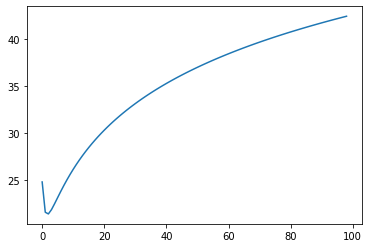

(3, 0.022314431669405655, 777, 0.08615903990710687)

In [6]:
opt_param(0.01, D, True)

optimal parameter
s = 34 , alpha = 0.03258622503973215
b = 1134 , p2 = 0.8923539216967419


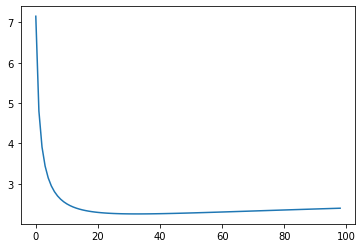

(34, 0.03258622503973215, 1134, 0.8923539216967419)

In [11]:
opt_param(0.2, True)

### 4. Regret bound comparison: OFedAQ, OFedAvg

In [18]:
def bound_comp():
    
    index_list = np.array(range(10, 200)) / 1000
    bound_AQ_list = []
    bound_Avg_list = []
    
    for p in range(10, 200):
        p1 = p / 1000
        s, alpha, b, p2 = opt_param(p1, D, False)
        bound_Avg_list.append(2/p1)
        
        bound_AQ = 2 * (1 + 1/(s * np.sqrt(alpha)) * (p2 + 1/K)) / p2
        bound_AQ_list.append(bound_AQ)
    
    plt.plot(index_list, bound_Avg_list, 'black', label='OFedAvg')
    plt.plot(index_list, bound_AQ_list, 'red', label='OFedAQ w/ optimal param')
    
    plt.xlabel('Reduction rate (p1 = 0.010 ~ 0.200)')
    plt.ylabel('Regret Bound')
    
    plt.rcParams["font.family"] = "Times New Roman"
    plt.grid()
    plt.legend()
    plt.show()

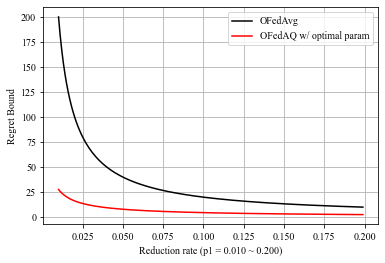

In [19]:
bound_comp()